In [2]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Meteor radars

* Dav        Davis; GW:200501-201912
* Col         Collm (Leipzig); GW:200408-201903
* Rio         RioGrande (SAAMER- Argentina); GW:200802-201912
* Sod        Sodankyla; GW:200810-201912
* Kir          Kiruna (Sweden ? Esrange); GW:199908-201912
* CMA      CMOR (Canada ? CMA (CMOR All) triple frequency data); GW:200201-201812
* SES        Sodankyla ? Esrange merged (assigned either to Esrange or Sodankyla or a virtual center in between); GW:199908-201912

## Juliusruh

In [3]:
alt_jul = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, \
    106, 108, 110, 112, 114, 116, 118, 120]
root_path = '/home/gemeinsam_tmp/UA_students/data/'

In [4]:
station = 'Col'
infiles = f'{root_path}{station}/Meteor_radar_{station}_GW_*.h5'
ds_jul = xr.open_mfdataset(infiles, concat_dim = 'phony_dim_6', group = 'wind', combine='nested', parallel = True)
ds_jul = ds_jul.rename({'phony_dim_6': 'time', 'phony_dim_7': 'alt'})
ds_jul['alt'] = alt_jul
ds_jul['alt'].attrs['units'] = 'km'
# change time range according to meteor radar station
ds_jul['time'] = pd.date_range(start = '2004-08-01', end = '2019-03-31', periods = ds_jul.time.shape[0]) 
ds_jul

,Array,Chunk
Bytes,26.61 MB,154.75 kB
Shape,"(127944, 26)","(744, 26)"
Count,528 Tasks,176 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,26.61 MB,154.75 kB
Shape,"(127944, 26)","(744, 26)"
Count,528 Tasks,176 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


### Gravity waves

In [5]:
ds_jul[var]

,Array,Chunk
Bytes,26.61 MB,154.75 kB
Shape,"(127944, 26)","(744, 26)"
Count,528 Tasks,176 Chunks
Type,float64,numpy.ndarray


In [6]:
wvar.plot(x='time', robust = True)


NameError: name 'wvar' is not defined

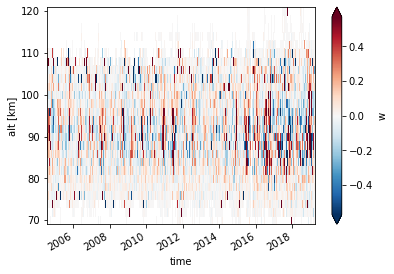

In [10]:
var ='w'
wvar = ds_jul[var]

wvar.plot(x='time', robust = True)

#### Tagesmittel berechnen

In [8]:
wvar_daily = wvar.resample(time='1D').mean('time')

wvar_daily.plot(x='time', robust = True, size = 10)

wvar_daily.time


NameError: name 'wvar' is not defined

#### Linienplot für eine einzelne Höhe mit .sel(alt='Höhe in km').plot.line()

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


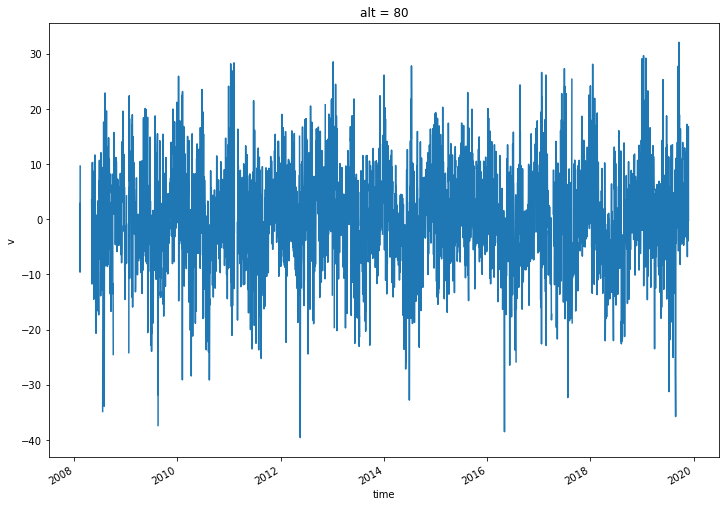

In [61]:
wvar_monthly.sel(alt=80).plot.line(size=8)

#### Einen bestimmten Zeitpunkt auswählen mit .sel(time = 'zeit')

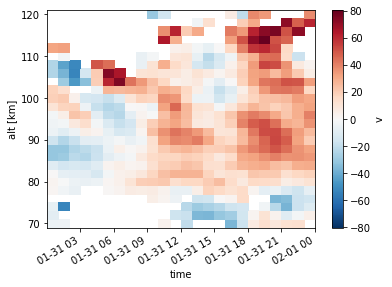

In [60]:
wvar.sel(time = '2016-01-31').plot(x='time')

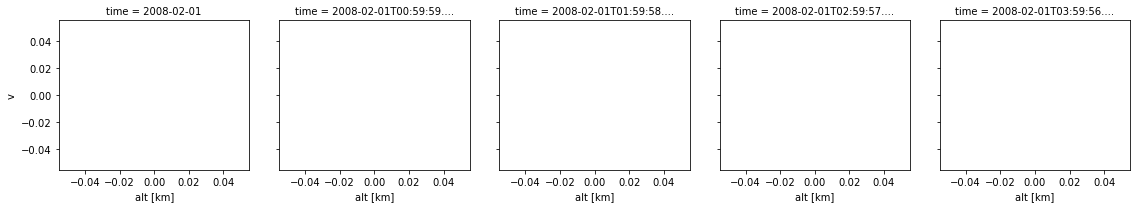

In [51]:
wvar.sel(alt=slice(None,80))[:5].plot.line(col = 'time')

#### Anomalien vom Jahresverlauf berechnen

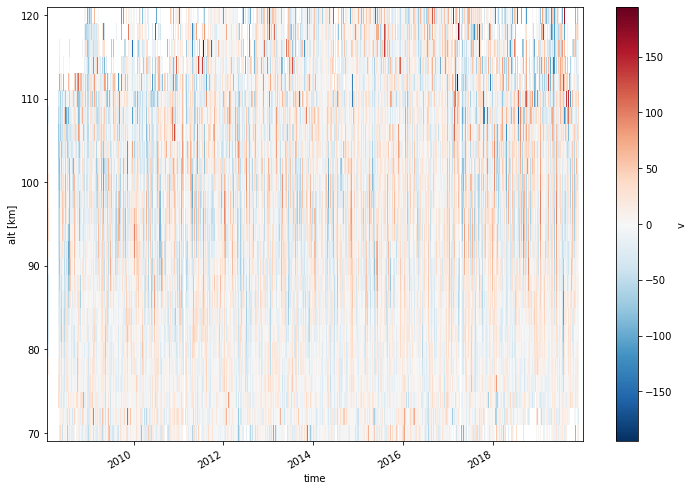

In [65]:
climatology = wvar.groupby("time.day").mean("time")
anomalies = wvar.groupby("time.day") - climatology
anomalies.plot(x='time',size=8)
#anomalies.mean("location").to_dataframe()[["tmin", "tmax"]].plot()

In [18]:
var = 'u'
da_jul_gwu = ds_jul[var]-ds_jul[f'{var}_fil']
var = 'v'
da_jul_gwv = ds_jul[var]-ds_jul[f'{var}_fil']
da_jul_gw_total = 0.5*(da_jul_gwu**2+ da_jul_gwv**2) # kinetic energy

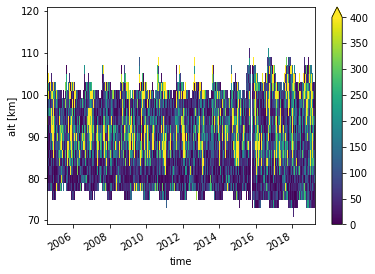

In [19]:
da_jul_gw_total.plot(x = 'time', robust = True, vmax = 400, vmin = 0)

#### Climatology calculation

In [20]:
da_jul_gw_total_clim = da_jul_gw_total.groupby('time.month').mean('time').load()
da_jul_gw_total_clim

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (month: 12, alt: 26)>
array([[         nan,  25.0896    ,  48.01309981,  49.90248972,
         49.02240942,  48.46720564,  80.86532176, 148.71607199,
        218.1146274 , 264.43415602, 287.78495413, 278.32545061,
        232.84716787, 192.1456069 , 220.64493653, 312.37942399,
        359.89488003, 332.49931125, 192.91635176,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,  61.90814004,  54.84138117,
         50.57352039,  49.39457697,  87.66216546, 155.53670842,
        228.4367863 , 272.88513981, 284.45848095, 255.28309001,
        190.15417202, 155.75547206, 213.75089462, 322.25269177,
        339.46450206, 254.42066875, 156.522075  ,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,  57.97373535,  53.51709898,
         51.56683078,  42.42395469,  61.05559816, 113.99926825,
        165.82051417, 190.55279729, 197.35382144, 181.0614338 ,
        138.13091553, 101.29322791, 116.75123364, 206.61407698,
        227.58140789,  92.93885   ,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,  52.18906789,  61.36614694,
         54.87468458,  42.60267003,  48.1808882 ,  89.37890439,
        138.19589467, 161.95258859, 163.40150993, 148.92148741,
        116.98486256,  83.8558487 ,  94.1799737 , 134.69256591,
        176.67686977,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,          nan,  68.60922969,
         68.59520368,  68.01108831,  56.28246144,  91.81908998,
        163.51321034, 209.3418313 , 201.70942592, 162.25898494,
        113.67418849,  84.00928501,  95.6189419 , 126.89794769,
        187.31577015, 608.03912857,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, 105.58600912,
        100.54651341,  92.81257242,  60.36261228,  68.9228908 ,
        110.69279011, 136.46543459, 127.12587323,  98.51589239,
         74.85294914,  63.81410999,  77.71236716, 110.15051283,
        108.35152321, 302.5277    ,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, 108.37552545,
        102.77221292,  86.30100093,  56.24569082,  59.65420069,
         94.08836874, 118.66947139, 113.55140636,  96.40598983,
         83.04651044,  74.88262506,  89.0021049 , 111.37582276,
        136.77476596, 157.19819667,  99.88693   ,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,          nan,  90.3082196 ,
         86.84052305,  64.29382554,  47.64251911,  66.45584614,
         98.41643519, 120.18260087, 124.62850909, 120.53512938,
        122.47934626, 128.83756004, 139.52862648, 157.45161674,
        166.03295376, 180.0926091 , 186.23608637, 171.96160229,
        110.09803704,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan, 103.34935833,  97.86775098,
         75.27010361,  48.87121163,  54.46434995, 101.44995785,
        153.25998929, 173.57767803, 175.62279207, 173.73065921,
        166.05375304, 153.36727531, 151.44298173, 171.9266775 ,
        174.54641934, 192.4333862 , 205.18666184, 181.50219557,
        203.74825   ,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,  59.09288243,  70.83948638,
         69.57686487,  47.2868854 ,  57.97336531, 107.68716628,
        159.86386742, 187.636951  , 196.775

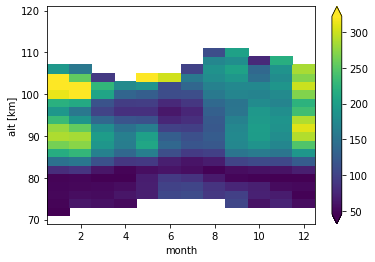

In [21]:
da_jul_gw_total_clim.plot(x = 'month', robust = True)

In [22]:
station = 'Rio'
infiles = f'{root_path}{station}/Meteor_radar_{station}_GW_*.h5'
ds_jul = xr.open_mfdataset(infiles, concat_dim = 'phony_dim_6', group = 'wind', combine='nested', parallel = True)
ds_jul = ds_jul.rename({'phony_dim_6': 'time', 'phony_dim_7': 'alt'})
ds_jul['alt'] = alt_jul
ds_jul['alt'].attrs['units'] = 'km'
ds_jul['time'] = pd.date_range(start = '2008-02-01', end = '2019-12-31', periods = ds_jul.time.shape[0])
ds_jul

,Array,Chunk
Bytes,21.73 MB,154.75 kB
Shape,"(104448, 26)","(744, 26)"
Count,429 Tasks,143 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,21.73 MB,154.75 kB
Shape,"(104448, 26)","(744, 26)"
Count,429 Tasks,143 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [30]:
xr.open_dataset( '/home/gemeinsam_tmp/UA_students/data/Rio/Meteor_radar_Rio_GW_200802.h5', group='info')['day']

<xarray.DataArray 'day' (phony_dim_0: 696, phony_dim_1: 1)>
array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [29.],
       [29.],
       [29.]])
Dimensions without coordinates: phony_dim_0, phony_dim_1
Attributes:
    day:      vector to constuct date and time

In [23]:
var = 'u'
da_jul_gwu = ds_jul[var]-ds_jul[f'{var}_fil']
var = 'v'
da_jul_gwv = ds_jul[var]-ds_jul[f'{var}_fil']
da_jul_gw_total = 0.5*(da_jul_gwu**2+ da_jul_gwv**2)
da_jul_gw_total_clim = da_jul_gw_total.groupby('time.month').mean('time').load()
da_jul_gw_total_clim

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (month: 12, alt: 26)>
array([[ 41.81531367,  64.04820926,  67.60282636,  93.45854375,
        110.06930871,  87.25695988,  68.59153517,  65.51240996,
         89.72839526, 114.6534767 , 134.92361907, 153.99092273,
        177.16851117, 203.63246464, 210.31735187, 190.14857476,
        156.31951107, 138.23055459, 124.55688515,  98.05390728,
         83.12707443,  85.16202   ,  66.64138571,  65.4981625 ,
         66.20605946,          nan],
       [ 71.184675  ,  66.14892659,  77.20833475,  87.54769098,
         81.43526547,  64.63393454,  58.01104504,  73.73484522,
         97.5879744 , 113.73233146, 128.68373417, 136.28026827,
        153.68761062, 188.21270855, 211.92527098, 201.23997791,
        174.44235981, 146.92564665, 117.52522147,  95.56733953,
         79.89398451,  71.33099784,  64.79758646,  13.71424667,
         32.948     ,          nan],
       [ 39.415545  ,  61.84706415,  62.58690232,  73.92271124,
         60.97390702,  53.22675597,  71.78338515, 115.21802795,
        155.64954993, 178.38694082, 183.64435704, 178.72381073,
        180.57343934, 206.1365517 , 250.99024261, 257.34401994,
        212.22834239, 164.56155535, 126.72528297, 106.00044594,
         83.72513983,  73.2019605 ,  92.68767588,  70.84056154,
                 nan,          nan],
       [ 41.27668657,  54.53155367,  57.15001197,  57.19440569,
         46.01357516,  43.05755583,  61.27934519,  94.09454529,
        130.42355962, 155.72878902, 177.58292646, 211.04871477,
        271.69135345, 374.56678611, 491.55549222, 505.03171215,
        371.48897931, 230.76573884, 157.29714353, 131.60114452,
        100.52912159,  77.45123965,  66.07808636,  80.5730971 ,
         91.5948    ,  75.90288158],
       [ 39.9773    ,  77.14773478,  63.72528709,  54.03976872,
         45.72017871,  51.84718984,  74.677513  , 108.06149884,
        143.0969447 , 177.42744195, 218.13860827, 279.02277519,
        365.38661411, 488.51932911, 589.73309907, 552.85892159,
        394.43141499, 246.99572856, 176.86848184, 139.32636667,
        121.76455473,  98.76562515,  93.85856351,  86.10531444,
         50.57796842,          nan],
       [         nan,  87.86233494,  60.52257518,  50.38314674,
         42.25559193,  53.11702033,  82.90926964, 125.55011357,
        164.60281315, 198.71036695, 239.63052142, 286.94518587,
        331.95152269, 344.85317111, 316.54633334, 257.19140325,
        211.37259717, 190.99697688, 163.06572373, 127.459343  ,
        107.23225436,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,  61.05071753,  56.95532792,  45.9371265 ,
         41.39384367,  51.2233404 ,  80.23118659, 115.5278964 ,
        144.51660343, 171.74848165, 194.92841528, 218.10086089,
        242.0254022 , 260.37358464, 254.80259911, 222.66585503,
        211.07576521, 177.46987178, 150.74926707, 112.68047363,
         87.58970714,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,  51.13821408,  54.4698409 ,  46.46052965,
         39.10603964,  49.83887144,  83.64161547, 122.51811691,
        151.92882562, 178.84920571, 197.68700045, 216.06201646,
        231.44851156, 244.10325781, 249.50332371, 259.70684138,
        241.10176551, 182.09419431, 136.27704991, 104.64322428,
        120.56727031,  62.11864444,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,  53.85769982,  56.38122596,
         46.35750663,  43.49302788,  71.26624118, 125.52648424,
        174.86045579, 205.51639136, 215.07685437, 218.91638307,
        218.12208994, 220.97823299, 233.43182727, 250.01838781,
        225.79063085, 153.88673078, 104.88685217,  97.46154688,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,  45.27013733,  68.2698071 ,
         58.08697046,  44.17936955,  59.94690256, 108.33671473,
        163.81059859, 210.10410759, 249.114

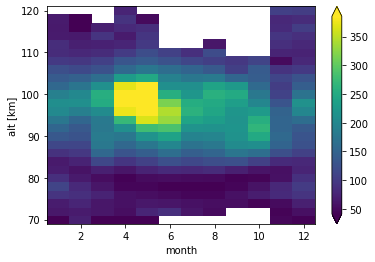

In [24]:
da_jul_gw_total_clim.plot(x = 'month', robust = True)

# GAIA

## Rio

In [27]:
root_path = '/home/gemeinsam_tmp/UA_students/data/'
infile = f'{root_path}GAIA_Rio_20080201_20141231_run20200603.nc'
ds = xr.open_dataset(infile, group='GAIA')
ds['time'] = pd.date_range(start = '2008-02-01', end = '2014-12-31', periods=ds.time.shape[0])
ds

PermissionError: [Errno 13] Permission denied: b'/home/gemeinsam_tmp/UA_students/data/GAIA_Rio_20080201_20141231_run20200603.nc'

### Tides amplitude in zonal wind (climatology)

#### Diurnal

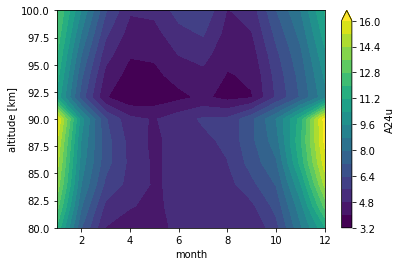

In [32]:
temp = ds['A24u'].sel(alt = slice(80,100)).groupby('time.month').mean('time')
temp.plot.contourf(x = 'month', robust = True, levels = 21)

#### Semi-diurnal

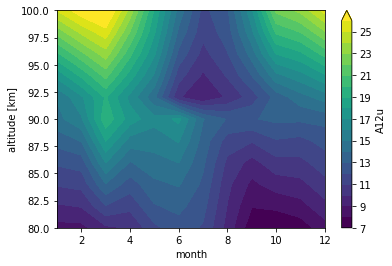

In [33]:
temp = ds['A12u'].sel(alt = slice(80,100)).groupby('time.month').mean('time')
temp.plot.contourf(x = 'month', robust = True, levels = 21)

#### Terdiurnal

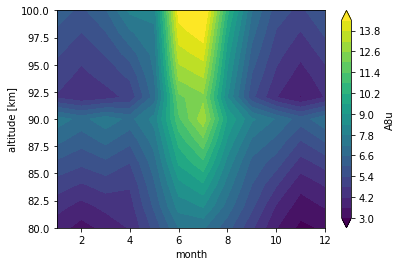

In [34]:
temp = ds['A8u'].sel(alt = slice(80,100)).groupby('time.month').mean('time')
temp.plot.contourf(x = 'month', robust = True, levels = 21)

### Gravity waves

In [35]:
var = 'u'
da_gwu = ds[var]-ds[f'{var}_fil']
var = 'v'
da_gwv = ds[var]-ds[f'{var}_fil']
da_gw_total = 0.5*(da_gwu**2+ da_gwv**2)
da_gw_total_clim = da_gw_total.groupby('time.month').mean('time')
da_gw_total_clim

/projekt4/hochatm/akuchar/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray (month: 12, alt: 93)>
array([[6.24610155e-02, 1.11046491e-01, 1.30973017e-01, ...,
        2.65541211e+02, 2.68197108e+02,            nan],
       [7.04654678e-02, 1.11121530e-01, 1.24302678e-01, ...,
        2.03973166e+02, 2.15736556e+02,            nan],
       [7.45035689e-02, 1.36622980e-01, 1.27935979e-01, ...,
        1.49597817e+02, 1.59341571e+02,            nan],
       ...,
       [1.44940225e-01, 2.29547771e-01, 3.34351996e-01, ...,
        1.43394578e+02, 1.49821403e+02,            nan],
       [1.21198229e-01, 2.30653552e-01, 3.14166054e-01, ...,
        1.78271528e+02, 1.78352275e+02,            nan],
       [9.23887624e-02, 1.70119331e-01, 2.06756741e-01, ...,
        2.28958954e+02, 2.30173452e+02,            nan]])
Coordinates:
  * alt      (alt) float64 16.0 18.0 20.0 22.0 24.0 ... 340.0 360.0 380.0 400.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

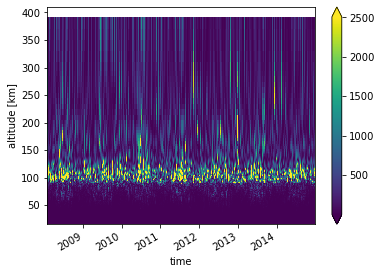

In [36]:
da_gw_total.plot(x = 'time', robust = True)

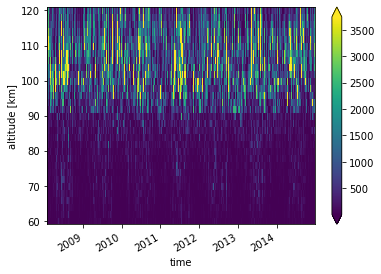

In [37]:
da_gw_total.sel(alt = slice(60,120)).plot(x = 'time', robust = True)

#### Climatology

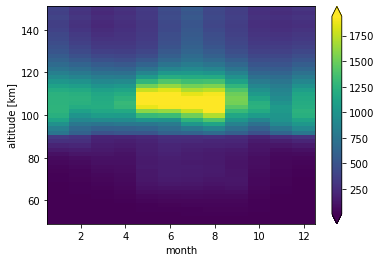

In [38]:
da_gw_total_clim.sel(alt = slice(50,150)).plot(x = 'month', robust = True)